In [1]:
from common import *
from matrix import *

In [2]:
%matplotlib notebook
canvas(9, 6)

# Matrix Factorization

In [3]:
def_matrices(globals(), df)#day_filter(df, 242))

In [4]:
# T-SNE
# unnormalized y.T: perplexity=2 (n_iter=10000)
# normalized y.T: perplexity=10 (n_iter=1000)

In [17]:
from sklearn.manifold import TSNE
theX = np.log(W.fillna(W.min().min() ** 10)).T
theX = center(theX)
vis = TSNE(n_components=2, perplexity=100, n_iter=10000).fit_transform(theX)

<IPython.core.display.Javascript object>


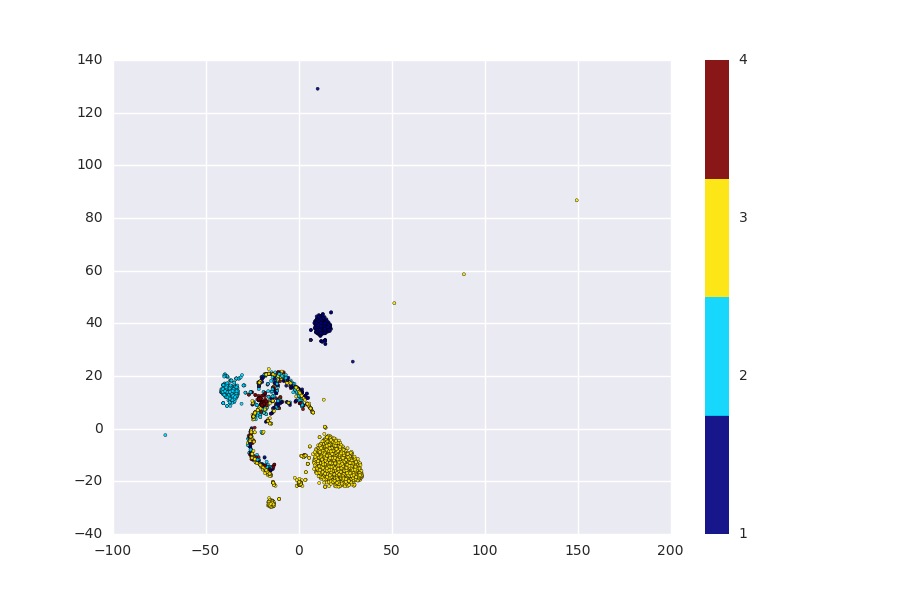

In [18]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
#vis = np.load(top_dir + 'data/analysis/tsne_vis/logW_nan=min^2_tsne_p100_(3D).npy')
plt.scatter(vis[:, 0], vis[:, 1], s=5, alpha=.9, c=market, cmap=plt.get_cmap('jet', 4))
plt.colorbar(ticks=[1, 2, 3, 4]);

In [19]:
np.save(top_dir + 'data/analysis/tsne_vis/logW_nan=min^10_CXC_tsne_p100', vis)

In [ ]:
'''# How to do ZCA using sklearn's PCA
# c.f. Michael Eickenberg on Google https://groups.google.com/forum/#!topic/theano-users/_63ggUdWeEI
pca = PCA(whiten=True)
transformed = pca.fit_transform(data)
pca.whiten = False
zca = pca.inverse_transform(transformed)
'''

In [116]:
theY, theW = (Y - Y.mean()).fillna(0).T, W.fillna(0).T
f = skPCA(theY.shape[0], whiten=True)
Yf = f.fit_transform(theY, weights=theW)
f.whiten=False
Ywhiten = f.inverse_transform(Yf)

TypeError: __init__() got an unexpected keyword argument 'whiten'

In [ ]:
# outliers when I didn't remove stocks with not enough valid dates

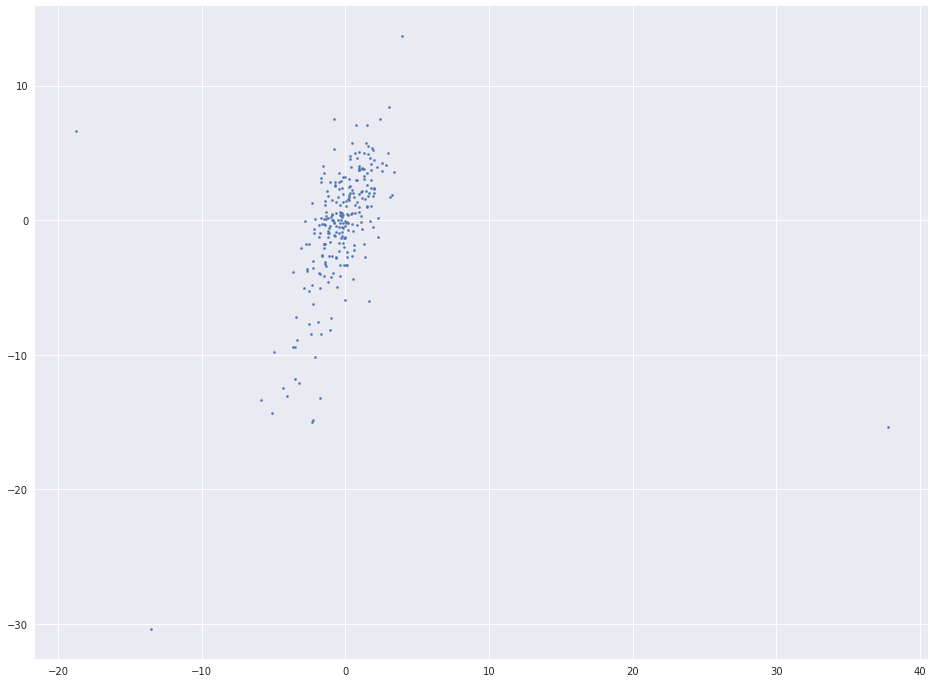

In [201]:
h = plt.scatter(Yf[:, 0], Yf[:, 1], s=5)

In [213]:
(
    (Yf[:, 0] > 30).nonzero() +
    (Yf[:, 0] < -15).nonzero() +
    (Yf[:, 1] < -30).nonzero() +
    (Yf[:, 1] > 10).nonzero() +
())

(array([257]), array([256]), array([253]), array([127]))